# Predicción de diagnóstico de diabetes

In [1]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import RepeatedKFold,KFold,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, precision_score,accuracy_score, recall_score,f1_score, roc_auc_score, roc_curve

2023-08-15 12:31:10.196294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data=pd.read_csv('/Users/sary/Documents/Machine Learning/Diplomado ML/Prediccion de diabetes/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
1,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
2,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
3,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
4,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
y=data.Outcome
del data['Outcome']
x=data
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,74.0,NaN,NaN,NaN,NaN,0.102,22
1,3,80.0,NaN,NaN,NaN,NaN,0.174,22
2,2,84.0,NaN,NaN,NaN,NaN,0.304,21
3,0,94.0,NaN,NaN,NaN,NaN,0.256,25
4,7,105.0,NaN,NaN,NaN,NaN,0.305,24


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [8]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
x.corrwith(y).sort_values(ascending=False)

Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
SkinThickness               0.259491
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
dtype: float64

In [10]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [11]:
x.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

# Regresión logística

In [12]:
#SimpleImputer
pipe=make_pipeline(SimpleImputer(strategy='median'),
                   LogisticRegression(solver='liblinear',class_weight='balanced'))

cv=RepeatedKFold(n_splits=10,n_repeats=5, random_state=1234)
score=cross_val_score(pipe,x,y,scoring='accuracy', cv=cv, n_jobs=-1) 
print('Accuracy = {:.4f} +/- {:.4f}'.format(score.mean(),score.std()))

Accuracy = 0.7606 +/- 0.0434


In [13]:
#KNNImputer
pipe=make_pipeline(KNNImputer(n_neighbors=10,weights='uniform'),
                  LogisticRegression(solver='liblinear',class_weight='balanced'))

cv=RepeatedKFold(n_splits=10,n_repeats=5)
score=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy = {:.4f} +/- {:.4f}'.format(score.mean(),score.std()))

Accuracy = 0.7645 +/- 0.0448


In [14]:
#SimpleImputer Hiperparametros
pipe=make_pipeline(SimpleImputer(strategy='median'),
                  LogisticRegression(solver='liblinear', class_weight='balanced'))

espacio_params={'logisticregression__C':[0.001,0.01,0.1,0.5,1,10]}

grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

La mejor configuración del parámetro de regularización es  {'logisticregression__C': 1}
El mejor valor de la métrica es  0.7599282296650718


In [15]:
#KNNImputer Hiperparametros
pipe=make_pipeline(KNNImputer(weights='uniform'),
                  LogisticRegression(solver='liblinear',class_weight='balanced'))

espacio_params={'knnimputer__n_neighbors':[2,4,6,8,10,12,15,20],
                'logisticregression__C':[0.001,0.01,0.1,0.5,1,10]}

grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

La mejor configuración del parámetro de regularización es  {'knnimputer__n_neighbors': 12, 'logisticregression__C': 1}
El mejor valor de la métrica es  0.7653827751196173


In [16]:
#Rellenar datos
imputer=KNNImputer(n_neighbors=12,weights='uniform')
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

#Escalar datos
scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

In [17]:
#Modelo
reg_log=LogisticRegression(solver='liblinear',C=1,class_weight='balanced')
reg_log.fit(x_completos,y)
reg_log

LogisticRegression(C=1, class_weight='balanced', solver='liblinear')

In [18]:
y_pred=reg_log.predict(x_completos)
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       463
           1       0.74      0.65      0.69       305

    accuracy                           0.77       768
   macro avg       0.76      0.75      0.75       768
weighted avg       0.77      0.77      0.77       768



In [19]:
reg_log_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.7624029850746269


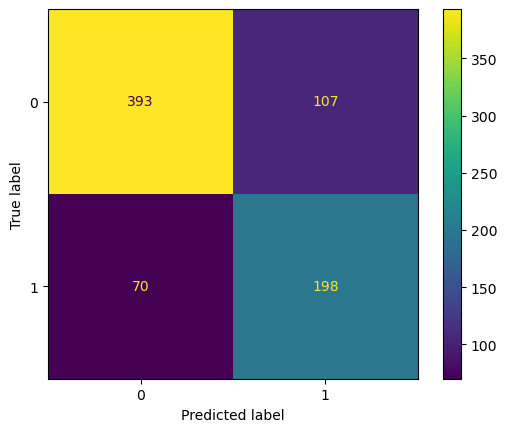

In [20]:
ConfusionMatrixDisplay(confusion_matrix(y,y_pred)).plot()
plt.show()

# Regresión logística con las 4 mejores features

In [21]:
x_best=SelectKBest(k=4).fit(x_completos,y)
x_best.get_feature_names_out()

array(['x1', 'x3', 'x4', 'x5'], dtype=object)

In [22]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [23]:
x_b=data[[ 'Glucose','SkinThickness','Insulin','BMI']]

In [24]:
#KNNImputer
pipe=make_pipeline(KNNImputer(n_neighbors=10,weights='uniform'),
                  LogisticRegression(solver='liblinear',class_weight='balanced'))

cv=RepeatedKFold(n_splits=10,n_repeats=5)
score=cross_val_score(pipe,x_b,y,scoring='accuracy',cv=cv,n_jobs=-2)
print('Accuracy = {:.4f} +/- {:.4f}'.format(score.mean(), score.std()))

Accuracy = 0.7284 +/- 0.0509


In [25]:
#SimpleImputer
pipe=make_pipeline(SimpleImputer(strategy='median'),
                   LogisticRegression(solver='liblinear',class_weight='balanced'))

cv=RepeatedKFold(n_splits=10,n_repeats=5)

score=cross_val_score(pipe,x_b,y,scoring='accuracy', cv=cv, n_jobs=-1) 

print('Accuracy = {:.4f} +/- {:.4f}'.format(score.mean(),score.std()))

Accuracy = 0.7240 +/- 0.0551


In [26]:
#Rellenar datos
imputer=KNNImputer(n_neighbors=10,weights='uniform')
x_completos=imputer.fit_transform(x_b)
x_completos=pd.DataFrame(x_completos)

#Modelo
rlog_b=LogisticRegression(solver='liblinear',class_weight='balanced')
rlog_b.fit(x_completos,y)
rlog_b

LogisticRegression(class_weight='balanced', solver='liblinear')

In [27]:
y_pred=rlog_b.predict(x_completos)
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78       452
           1       0.71      0.60      0.65       316

    accuracy                           0.73       768
   macro avg       0.73      0.71      0.72       768
weighted avg       0.73      0.73      0.73       768



In [28]:
rlog_b_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.7256119402985075


# KNN

In [29]:
pipe=make_pipeline(SimpleImputer(strategy='median'),
                   StandardScaler(),
                   KNeighborsClassifier(weights='uniform'))

cv=RepeatedKFold(n_splits=10, n_repeats=5)

scores=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('Accuracy = {:.4f} +/- {:.4f}'.format(scores.mean(),scores.std()))

Accuracy = 0.7357 +/- 0.0447


In [30]:
knn=KNeighborsClassifier(n_neighbors=10)

#Rellenar datos
nombres=x.columns
imputer=SimpleImputer(strategy='median')
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos,columns=nombres)

#Escalar datos
scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

In [31]:
#Modelo
knn.fit(x_completos,y)
knn

KNeighborsClassifier(n_neighbors=10)

In [32]:
y_pred=knn.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       500
           1       0.78      0.57      0.66       268

    accuracy                           0.79       768
   macro avg       0.79      0.74      0.75       768
weighted avg       0.79      0.79      0.78       768



In [33]:
knn_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.7414477611940299


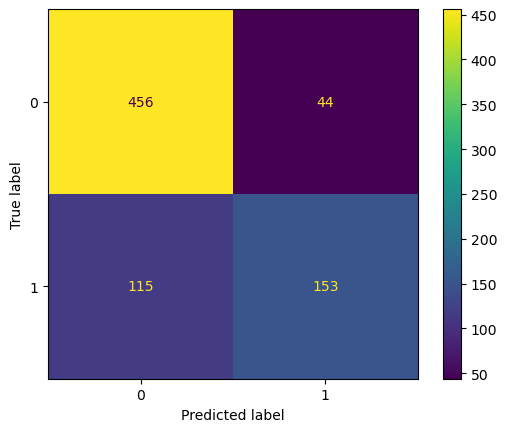

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

# K vecinos ponderados

In [35]:
#Hiperparametros
espacio_params={'kneighborsclassifier__n_neighbors':[2,4,6,8,10,12,15,20,25,30,35,40],
                'kneighborsclassifier__p':[1,2,3,4,5,6,7,8,9]}


pipe=make_pipeline(SimpleImputer(strategy='median'),
                   StandardScaler(),
                   KNeighborsClassifier())

grid=GridSearchCV(pipe,espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [2, 4, 6, 8, 10,
                                                               12, 15, 20, 25,
                                                               30, 35, 40],
                         'kneighborsclassifier__p': [1, 2, 3, 4, 5, 6, 7, 8,
                                                     9]},
             scoring='accuracy')

In [36]:
#Resultados
print('Los mejores valores de los hiperparametros son ',grid.best_params_)
print('El mejor valor de la metrica es ',grid.best_score_)

Los mejores valores de los hiperparametros son  {'kneighborsclassifier__n_neighbors': 35, 'kneighborsclassifier__p': 2}
El mejor valor de la metrica es  0.7663978127136022


In [37]:
knp=KNeighborsClassifier(n_neighbors=35,weights='uniform',p=2)

#Rellenar datos
nombres=x.columns
imputer=SimpleImputer(strategy='median')
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos,columns=nombres)

#Escalar datos
scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

knp.fit(x_completos,y)

KNeighborsClassifier(n_neighbors=35)

In [38]:
y_pred= knp.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.59      0.66       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



In [39]:
knp_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.7387761194029852


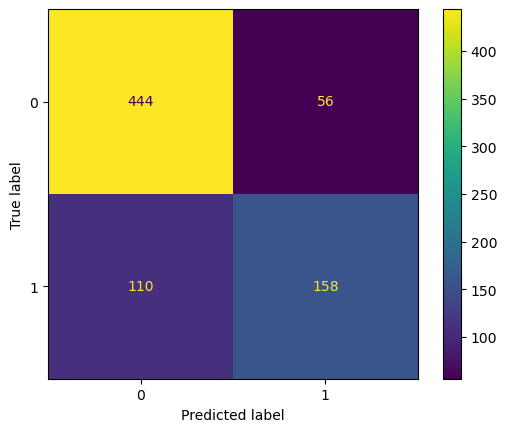

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

# Árboles de decisión 

In [41]:
pipe=make_pipeline(KNNImputer(n_neighbors=10,weights='uniform'),
                   StandardScaler(),
                   DecisionTreeClassifier(class_weight='balanced'))

cv=RepeatedKFold(n_splits=10,n_repeats=5)
score=cross_val_score(pipe,x,y,scoring='accuracy', cv=cv, n_jobs=-1) 
print('La exactitud promedio es {:.4f} +/- {:.4f}'.format(score.mean(),score.std()))

La exactitud promedio es 0.6987 +/- 0.0448


In [42]:
#Hiperparametros
espacio_params={'knnimputer__n_neighbors':[2,4,6,8,10,12,14,16,18,20],
                'decisiontreeclassifier__min_samples_split':np.arange(5,20,1),
                'decisiontreeclassifier__min_samples_leaf':np.arange(5,20,1)}

#Rejilla de busqueda
grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)
print('La mejor calibracion de los hiperparametros es ', grid.best_params_)
print('Mejor valor de la metrica ', grid.best_score_)

La mejor calibracion de los hiperparametros es  {'decisiontreeclassifier__min_samples_leaf': 19, 'decisiontreeclassifier__min_samples_split': 5, 'knnimputer__n_neighbors': 14}
Mejor valor de la metrica  0.7648872180451128


In [43]:
#Rellenar y escalar datos
imputer=KNNImputer(n_neighbors=14, weights='uniform')
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

tree_model=DecisionTreeClassifier(class_weight='balanced',
                                  min_samples_leaf=19,
                                  min_samples_split=5)
tree_model.fit(x_completos,y)
tree_model

DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=19,
                       min_samples_split=5)

In [44]:
y_pred=tree_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       500
           1       0.74      0.81      0.77       268

    accuracy                           0.83       768
   macro avg       0.82      0.83      0.82       768
weighted avg       0.84      0.83      0.84       768



In [45]:
tree_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.8297164179104477


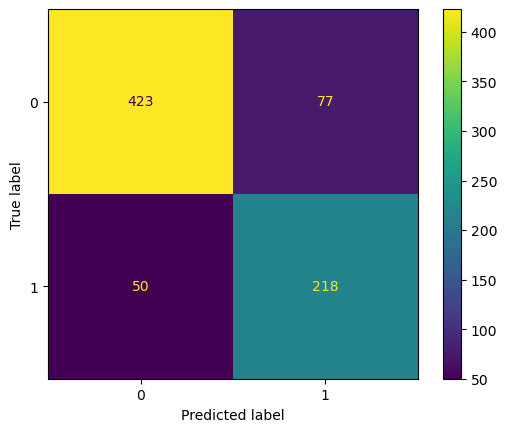

In [46]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

# Random Forest

In [47]:
pipe=make_pipeline(KNNImputer(n_neighbors=10,weights='uniform'),
                   RandomForestClassifier(n_estimators=100,class_weight='balanced'))

cv=KFold(n_splits=10)
score=cross_val_score(pipe,x,y,scoring='accuracy', cv=cv, n_jobs=-1) 
print('La exactitud promedio es {:.4f} +/- {:.4f}'.format(score.mean(),score.std()))

La exactitud promedio es 0.7315 +/- 0.0974


In [48]:
#Hiperparametros
espacio_params={'knnimputer__n_neighbors':[2,4,6,8,10,15,20],
                'randomforestclassifier__max_depth':np.arange(5,20,1),
                'randomforestclassifier__min_samples_leaf':np.arange(5,20,1)}

#Rejilla de busqueda
grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)
print('La mejor calibracion de los hiperparametros es ', grid.best_params_)
print('Mejor valor de la metrica ', grid.best_score_)

La mejor calibracion de los hiperparametros es  {'knnimputer__n_neighbors': 4, 'randomforestclassifier__max_depth': 13, 'randomforestclassifier__min_samples_leaf': 10}
Mejor valor de la metrica  0.7615345181134655


In [49]:
#Rellenar datos
imputer_forest=KNNImputer(n_neighbors=4)
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

#Escalar datos
scale_forest=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

forest_model=RandomForestClassifier(n_estimators=100,criterion='entropy',class_weight='balanced',
                                  max_depth=13,min_samples_leaf=10)
forest_model.fit(x_completos,y)
forest_model 

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=13, min_samples_leaf=10)

In [50]:
y_pred=forest_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       500
           1       0.71      0.89      0.79       268

    accuracy                           0.84       768
   macro avg       0.82      0.85      0.83       768
weighted avg       0.86      0.84      0.84       768



In [51]:
forest_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.8488955223880597


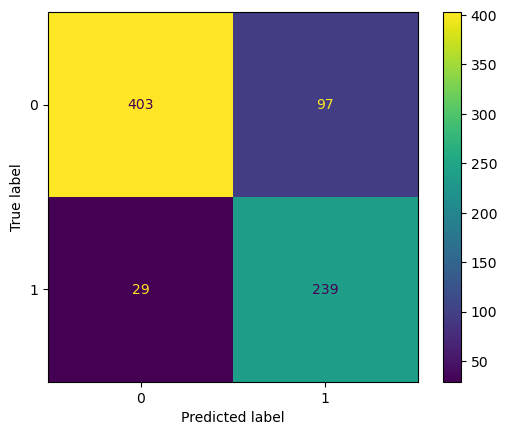

In [52]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

# Naive-Bayes

In [53]:
pipe=make_pipeline(KNNImputer(n_neighbors=10),
                   GaussianNB())

cv=RepeatedKFold(n_splits=10,n_repeats=5)

score=cross_val_score(pipe,x,y,scoring='accuracy', cv=cv, n_jobs=-1) 
print('La exactitud promedio es {:.4f} +/- {:.4f}'.format(score.mean(),score.std()))

La exactitud promedio es 0.7482 +/- 0.0489


In [54]:
nb= GaussianNB()

#Rellenar datos
imputer=KNNImputer(n_neighbors=7)
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

#Escalar datos
scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

nb_model=GaussianNB()
nb_model.fit(x_completos,y)
nb_model

GaussianNB()

In [55]:
y_pred=nb_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       500
           1       0.65      0.63      0.64       268

    accuracy                           0.75       768
   macro avg       0.73      0.72      0.73       768
weighted avg       0.75      0.75      0.75       768



In [56]:
nb_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.7244328358208956


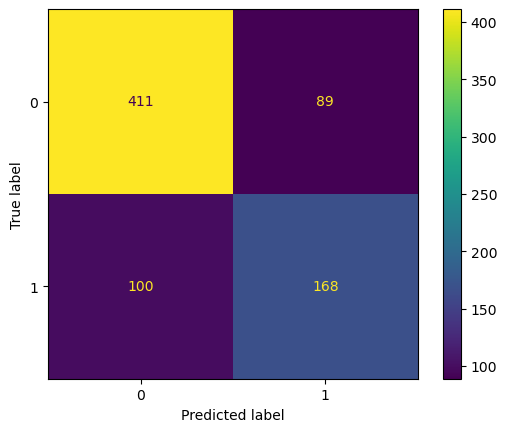

In [57]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

# Maquinas de Vector Soporte

In [58]:
pipe=make_pipeline(KNNImputer(n_neighbors=9, weights='uniform'), StandardScaler(), 
                   LinearSVC(C=1, loss='hinge',dual=True,class_weight='balanced',max_iter=5000000))

espacio_params={'knnimputer__n_neighbors':[2,3,4,5,7,8,10,12,15,20],
                'linearsvc__C':[0.001,0.01,0.1,1,10,15,20,100]}

grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


La mejor configuración del parámetro de regularización es  {'knnimputer__n_neighbors': 15, 'linearsvc__C': 10}
El mejor valor de la métrica es  0.760509227614491


In [60]:
#Rellenar datos
imputer=KNNImputer(n_neighbors=15)
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

#Escalar datos
scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

svm_model=LinearSVC(C=10,dual=True,loss='hinge',class_weight='balanced',max_iter=5000)
svm_model.fit(x_completos,y)
svm_model

/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, class_weight='balanced', dual=True, loss='hinge', max_iter=5000)

In [61]:
y_pred=svm_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       500
           1       0.64      0.73      0.68       268

    accuracy                           0.76       768
   macro avg       0.74      0.75      0.75       768
weighted avg       0.77      0.76      0.76       768



In [62]:
svm_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.7538059701492538


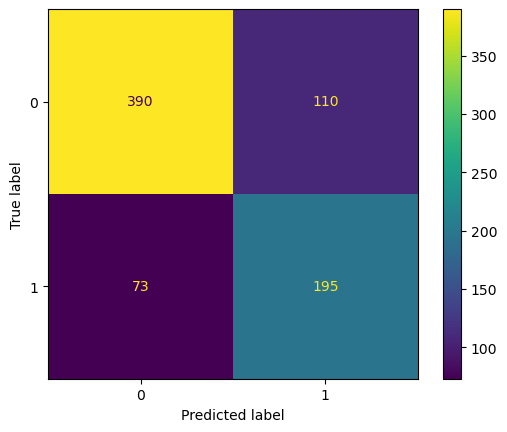

In [63]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

# XGBoosting

In [64]:
pipe=make_pipeline(KNNImputer(n_neighbors=10,weights='uniform'),
                   XGBClassifier(n_estimators=100))

cv=RepeatedKFold(n_splits=10,n_repeats=5)
score=cross_val_score(pipe,x,y,scoring='accuracy', cv=cv, n_jobs=-1) 
print('La exactitud promedio es {:.4f} +/- {:.4f}'.format(score.mean(),score.std()))

La exactitud promedio es 0.7363 +/- 0.0468


In [65]:
#Hiperparametros
espacio_params={'knnimputer__n_neighbors':[3,5,7,9,13,15,20],
                'xgbclassifier__learning_rate':[0.001,0.1,0.15,0.5,1],
                'xgbclassifier__subsample':[0.5,0.6,0.7,0.8,1],
                'xgbclassifier__colsample_bytree':[0.5,0.7,0.8,0.9],
                'xgbclassifier__max_depth':np.arange(5,20,1),}

#Rejilla de busqueda
grid=RandomizedSearchCV(pipe,n_iter=100,param_distributions=espacio_params,
                        scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)
print('La mejor calibracion de los hiperparametros es ', grid.best_params_)
print('Mejor valor de la metrica ', grid.best_score_)

La mejor calibracion de los hiperparametros es  {'xgbclassifier__subsample': 1, 'xgbclassifier__max_depth': 19, 'xgbclassifier__learning_rate': 0.001, 'xgbclassifier__colsample_bytree': 0.8, 'knnimputer__n_neighbors': 15}
Mejor valor de la metrica  0.7682399179767601


In [66]:
#Rellenar datos
imputer_xgb=KNNImputer(n_neighbors=15)
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

#Escalar datos
scale_xgb=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

xgboost_model=XGBClassifier(n_estimators=100,objective='binary:logistic',scale_pos_weight=1.89,
                           subsample=1,max_depth=19,learning_rate=0.001,colsample_bytree=0.8)
xgboost_model.fit(x_completos,y)
xgboost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
y_pred=xgboost_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       500
           1       0.89      0.97      0.93       268

    accuracy                           0.95       768
   macro avg       0.94      0.96      0.95       768
weighted avg       0.95      0.95      0.95       768



In [68]:
xgb_score=precision_score(y_pred,y, average='macro')
print('La precision es ',precision_score(y_pred,y, average='macro'))

La precision es  0.9559402985074626


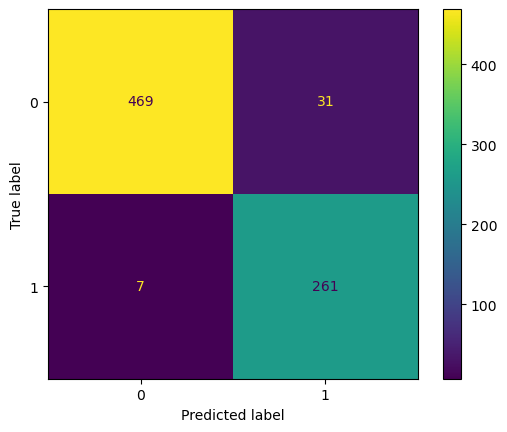

In [69]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

# Red Neuronal

In [70]:
print(tf.config.list_physical_devices('GPU'))

[]


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [72]:
x_train.shape

(614, 8)

In [73]:
imputer=SimpleImputer(strategy='median')
scale=StandardScaler()

x_train=imputer.fit_transform(x_train)
x_train=scale.fit_transform(x_train)

x_test=imputer.transform(x_test)
x_test=scale.transform(x_test)

In [75]:
net=Sequential()
net.add(Dense(units=25,input_dim=x_train.shape[1],activation='relu'))
net.add(Dense(units=25,activation='relu'))
net.add(Dropout(0.3))
net.add(Dense(units=25,activation='relu'))
net.add(Dropout(0.3))
net.add(Dense(units=1,activation='sigmoid'))
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                225       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-traina

In [76]:
metricas=[keras.metrics.FalseNegatives(name='fn'),
         keras.metrics.FalsePositives(name='fp'),
         keras.metrics.Precision(name='precision'),
         keras.metrics.Recall(name='recall')]

In [77]:
opt= keras.optimizers.Adam(learning_rate=0.01)
net.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=metricas
)

In [78]:
print('Entrenando modelo...')
historial=net.fit(x_train,y_train,epochs=50,batch_size=20,
                  validation_split=0.2,verbose=False)
print('Modelo entrenado')

Entrenando modelo...
Modelo entrenado


In [79]:
y_pred_proba=net.predict(x_test)
y_pred=y_pred_proba.round()

5/5 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.73      0.83      0.78       100
           1       0.57      0.43      0.49        54

    accuracy                           0.69       154
   macro avg       0.65      0.63      0.63       154
weighted avg       0.67      0.69      0.68       154



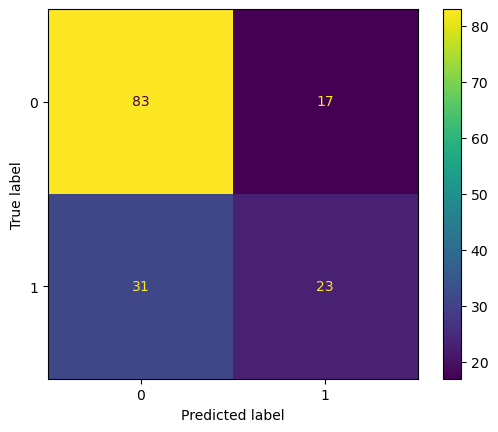

In [80]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
print(classification_report(y_test,y_pred))

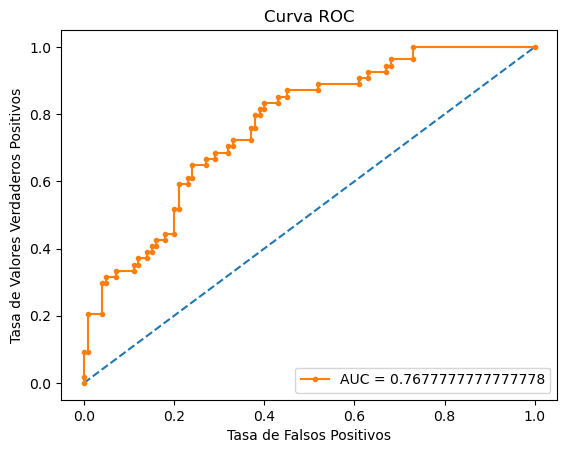

In [81]:
false_positive_rate,true_positive_rate, proba = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot([0,1], [0,1], linestyle='--') 
plt.plot(false_positive_rate,true_positive_rate, marker='.', 
         label=f'AUC = {roc_auc_score(y_test, y_pred_proba)}')
plt.title('Curva ROC')
plt.ylabel('Tasa de Valores Verdaderos Positivos')
plt.xlabel('Tasa de Falsos Positivos')
plt.legend(loc='lower right')

In [82]:
optimal_proba_cutoff=sorted(list(zip(np.abs(true_positive_rate - false_positive_rate),proba)),key=lambda i: i[0], reverse=True)[0][1]
optimal_proba_cutoff

0.101697646

In [83]:
y_pred=[1 if i>=optimal_proba_cutoff else 0 for i in y_pred_proba]

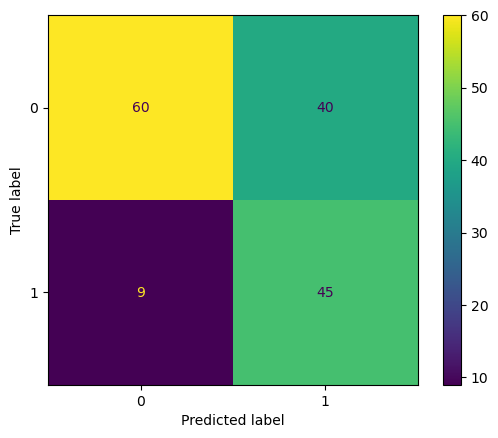

In [84]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

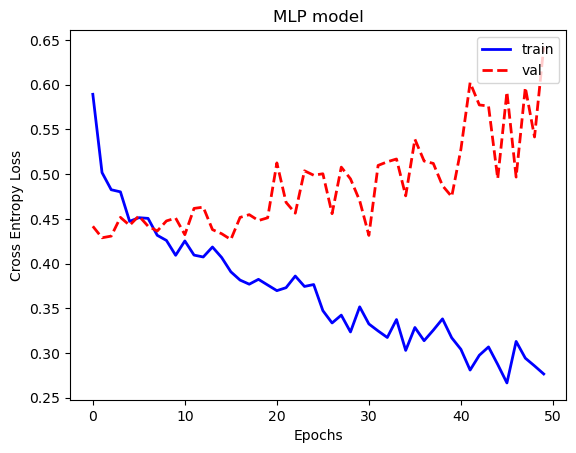

In [85]:
#Funcion de perdida
plt.figure()
plt.plot(historial.history['loss'],'b',lw=2.0,label='train')
plt.plot(historial.history['val_loss'],'--r',lw=2.0,label='val')
plt.title('MLP model')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc='upper right')
plt.show

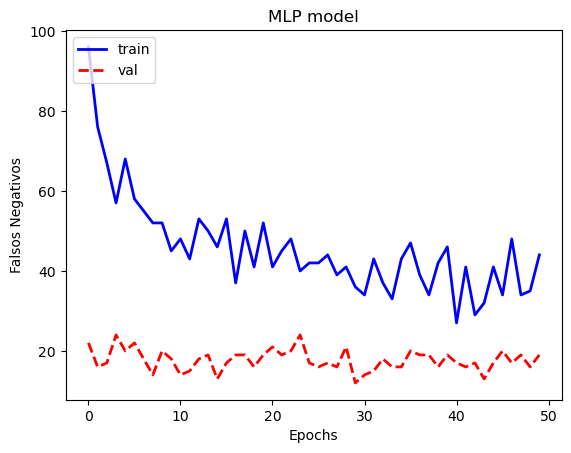

In [86]:
plt.figure()
plt.plot(historial.history['fn'], 'b', lw=2.0, label='train')
plt.plot(historial.history['val_fn'], '--r', lw=2.0, label='val')
plt.title('MLP model')
plt.xlabel('Epochs')
plt.ylabel('Falsos Negativos')
plt.legend(loc='upper left')
plt.show()

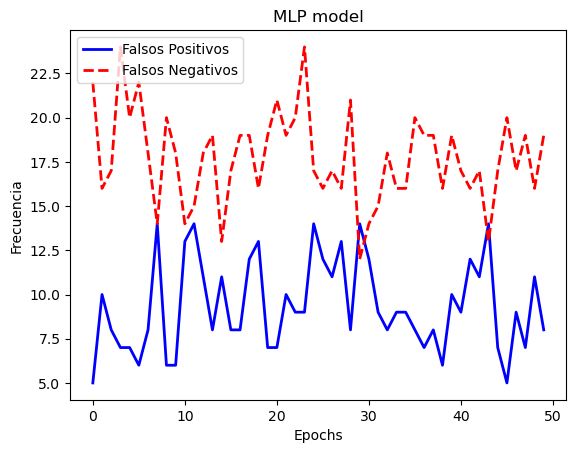

In [87]:
plt.figure()
plt.plot(historial.history['val_fp'], 'b', lw=2.0, label='Falsos Positivos')
plt.plot(historial.history['val_fn'], '--r', lw=2.0, label='Falsos Negativos')
plt.title('MLP model')
plt.xlabel('Epochs')
plt.ylabel('Frecuencia')
plt.legend(loc='upper left')
plt.show()

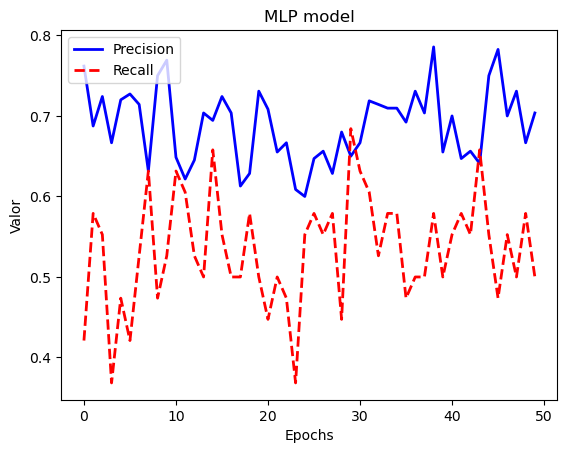

In [88]:
plt.figure()
plt.plot(historial.history['val_precision'], 'b', lw=2.0, label='Precision')
plt.plot(historial.history['val_recall'], '--r', lw=2.0, label='Recall')
plt.title('MLP model')
plt.xlabel('Epochs')
plt.ylabel('Valor')
plt.legend(loc='upper left')
plt.show()

In [89]:
net_score= scores[1]
net_score

0.7012987012987013

In [90]:
models = pd.DataFrame({
    'Modelo':['Regresión logística', 'Regresión logística KBest', 
              'KNN', 'KNP','Árboles de decisión','Random Forest',
              'Naive-Bayes', 'SVM','XGBoosting', 'Red Neuronal'],
    'Accuracy':[reg_log_score,rlog_b_score,knn_score,knp_score,
                tree_score,forest_score,nb_score, svm_score,
                xgb_score, net_score]})
models.sort_values(by='Accuracy', ascending=False)

,Modelo,Accuracy
8,XGBoosting,0.955940
5,Random Forest,0.848896
4,Árboles de decisión,0.829716
0,Regresión logística,0.762403
7,SVM,0.753806
2,KNN,0.741448
3,KNP,0.738776
1,Regresión logística KBest,0.725612
6,Naive-Bayes,0.724433
9,Red Neuronal,0.701299
